In [213]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [214]:
client = bigquery.Client()

In [215]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [216]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [217]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [218]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [249]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [251]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 737 to 1269
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [252]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-06-01_2020-07-05.csv")

In [253]:
julysale.columns.values[1] = 'SKU'

In [254]:
julysale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_title  2060 non-null   object 
 1   SKU            2060 non-null   object 
 2   day            2060 non-null   object 
 3   net_quantity   2060 non-null   int64  
 4   gross_sales    2060 non-null   float64
 5   discounts      2060 non-null   float64
 6   returns        2060 non-null   float64
 7   net_sales      2060 non-null   float64
 8   taxes          2060 non-null   float64
 9   total_sales    2060 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 161.1+ KB


In [255]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [256]:
julysale

,product_title,SKU,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,...,ASIN,BARCODE,NAME(KR),SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR)
0,Portable Fan with Cradle Stand - Ryan,F08846,2020-06-25,5,133.27,-21.30,0.00,111.97,22.40,134.37,...,B07RZ1FSN7,8809641467386,크레들 핸디형 선풍기_라이언,F08846,B07RZ1FSN7,Ryan,Home,Fans,Basic,크레들 핸디형 선풍기_라이언
1,"Yumyum Friends, Tote bag - Little Ryan",F10931,2020-06-05,5,114.95,-3.43,0.00,111.52,0.00,111.52,...,None,8809681708968,얌얌 에코백_리틀라이언,F10931,None,Ryan,Accessories,Canvas bag,Lemon Terras,얌얌 에코백_리틀라이언
2,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-15,4,69.95,-13.97,-11.19,44.79,0.00,44.79,...,B086MQ57RX,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언
3,"Happy Weeks, Removable Stickers - Apeach",F10751,2020-07-03,4,17.05,-5.11,0.00,11.94,2.03,13.97,...,B084JSM6YB,8809681707459,해피위크 리무버블스티커_어피치,F10751,B084JSM6YB,Apeach,Stationery,Stickers,Happy Weeks,해피위크 리무버블스티커_어피치
4,Silicone Mood Lamp - Little Apeach,F09049,2020-06-12,4,103.56,0.00,0.00,103.56,0.00,103.56,...,None,8809656134594,실리콘무드등_리틀어피치,36,None,Apeach,Home,Mood Lamp,Little Friends,실리콘무드등_리틀어피치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-12,-1,0.00,0.00,-13.99,-13.99,0.00,-13.99,...,B086MQ57RX,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언
2056,Keyring for AirPods cases - Little Ryan,F09703,2020-06-09,-1,0.00,0.00,-8.49,-8.49,0.00,-8.49,...,B07S1WNM35,8809656137403,에어팟키링-리틀라이언,F09703,B07S1WNM35,Ryan,Tech&Accs,Airpods Keyring,Little Friends,에어팟키링-리틀라이언
2057,"Skateboard Cotton Face Socks - Ryan, Heel",93009450,2020-06-16,-2,0.00,0.00,-6.48,-6.48,0.00,-6.48,...,B07RYN2GKC,8809656137113,라인보드삭스-라이언,93009450,B07RYN2GKC,Ryan,Accessories,Socks,Basic,라인보드삭스-라이언
2058,Mini Pillow - Lovely Ryan,F09923,2020-06-22,-2,0.00,0.00,-24.00,-24.00,0.00,-24.00,...,None,8809641469113,베이비필로우_러블리라이언,50,None,Ryan,Plush,Mini Pillow,Lovely Ryan,베이비필로우_러블리라이언


In [257]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [258]:
julysale['dayofweek'] = julysale['day'].dt.week
#sale['sale_month'] = sale['purchase-date'].dt.month


In [259]:
julysale

,product_title,SKU,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,...,BARCODE,NAME(KR),SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR),dayofweek
0,Portable Fan with Cradle Stand - Ryan,F08846,2020-06-25,5,133.27,-21.30,0.00,111.97,22.40,134.37,...,8809641467386,크레들 핸디형 선풍기_라이언,F08846,B07RZ1FSN7,Ryan,Home,Fans,Basic,크레들 핸디형 선풍기_라이언,26
1,"Yumyum Friends, Tote bag - Little Ryan",F10931,2020-06-05,5,114.95,-3.43,0.00,111.52,0.00,111.52,...,8809681708968,얌얌 에코백_리틀라이언,F10931,None,Ryan,Accessories,Canvas bag,Lemon Terras,얌얌 에코백_리틀라이언,23
2,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-15,4,69.95,-13.97,-11.19,44.79,0.00,44.79,...,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언,25
3,"Happy Weeks, Removable Stickers - Apeach",F10751,2020-07-03,4,17.05,-5.11,0.00,11.94,2.03,13.97,...,8809681707459,해피위크 리무버블스티커_어피치,F10751,B084JSM6YB,Apeach,Stationery,Stickers,Happy Weeks,해피위크 리무버블스티커_어피치,27
4,Silicone Mood Lamp - Little Apeach,F09049,2020-06-12,4,103.56,0.00,0.00,103.56,0.00,103.56,...,8809656134594,실리콘무드등_리틀어피치,36,None,Apeach,Home,Mood Lamp,Little Friends,실리콘무드등_리틀어피치,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-12,-1,0.00,0.00,-13.99,-13.99,0.00,-13.99,...,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언,24
2056,Keyring for AirPods cases - Little Ryan,F09703,2020-06-09,-1,0.00,0.00,-8.49,-8.49,0.00,-8.49,...,8809656137403,에어팟키링-리틀라이언,F09703,B07S1WNM35,Ryan,Tech&Accs,Airpods Keyring,Little Friends,에어팟키링-리틀라이언,24
2057,"Skateboard Cotton Face Socks - Ryan, Heel",93009450,2020-06-16,-2,0.00,0.00,-6.48,-6.48,0.00,-6.48,...,8809656137113,라인보드삭스-라이언,93009450,B07RYN2GKC,Ryan,Accessories,Socks,Basic,라인보드삭스-라이언,25
2058,Mini Pillow - Lovely Ryan,F09923,2020-06-22,-2,0.00,0.00,-24.00,-24.00,0.00,-24.00,...,8809641469113,베이비필로우_러블리라이언,50,None,Ryan,Plush,Mini Pillow,Lovely Ryan,베이비필로우_러블리라이언,26


In [282]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'

In [260]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

27    7
26    7
25    7
24    7
23    7
Name: dayofweek, dtype: int64

In [261]:
theme_sale = pd.pivot_table(julysale,index = 'THEME', columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [262]:
theme_sale =  theme_sale.sort_values(by = 27, ascending = False)

In [263]:
theme_sale

dayofweek,23,24,25,26,27,All
THEME,,,,,,
All,411,401,602,384,489,2287
Little Friends,87,112,125,82,97,503
Basic,61,88,90,57,82,378
Happy Weeks,46,27,70,59,78,280
Baby Dreaming,36,21,69,50,55,231
Kang Daniel,15,8,31,4,50,108
Lemon Terras,42,21,75,44,39,221
Lovely Apeach,11,20,17,10,21,79
Yamyam Friends,30,17,24,24,15,110


In [286]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
category_overall = category_overall.sort_values(by = 27, ascending=False)
category_overall

dayofweek,23,24,25,26,27,All
CATEGORY,,,,,,
All,411,401,602,384,489,2287
Stationery,48,84,120,77,120,449
Accessories,111,76,114,75,109,485
Plush,66,53,122,42,80,363
Tech&Accs,71,56,72,62,58,319
Living,55,45,75,55,47,277
Travel,9,11,15,8,22,65
Home,9,16,25,19,15,84
Bath,15,17,19,26,14,91


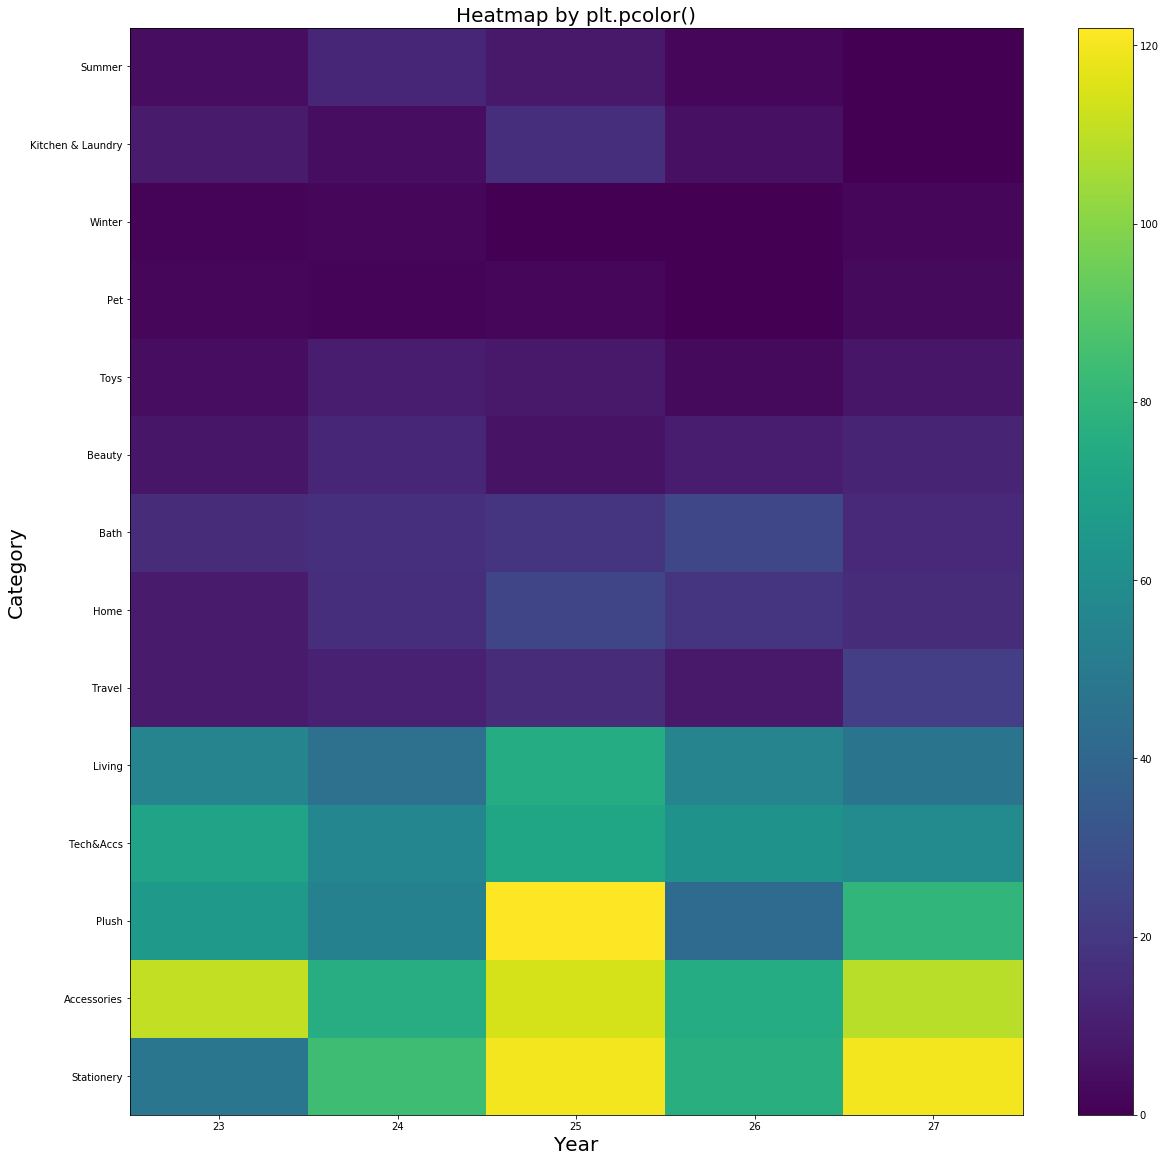

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 20]

category_overall.drop('All', axis = 'columns', inplace = True)
category_overall.drop('All', axis = 'index', inplace = True)

# heatmap by plt.pcolor()
def heatmap (chart, chartsize, font_size):
    plt.rcParams['figure.figsize'] = [chartsize, chartsize]
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title('Heatmap by plt.pcolor()', fontsize=font_size)
    plt.xlabel('Year', fontsize=font_size)
    plt.ylabel('Category', fontsize=font_size)
    plt.colorbar()

heatmap(category_overall, 20, 20)
#plt.savefig('sale_per_category.png')

In [288]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [289]:
category_sale  = category_sale.sort_values(by = 27, ascending = False)
category_sale

dayofweek                                      23   24   25   26   27   All
CATEGORY    ITEM           NAME(KR)                                        
All                                           411  401  602  384  489  2287
Plush       Body pillow    강다니엘에디션 바디필로우        3    1    2    0   11    17
            Mini Pillow    베이비드리밍 타이니프렌즈_라이언    3    0   11    2    8    24
Accessories Cross bag      강다니엘에디션 블랙후디(여성)     0    0    1    0    7     8
Stationery  Message Cards  리틀스케치북_카드_생일축하       0    4    4    1    7    16
...                                           ...  ...  ...  ...  ...   ...
Accessories Canvas bag     레이지 미니에코백_리틀라이언      4    0    3    2   -1     8
Stationery  Notepads       어텀스토리 라지스프링노트_라이언   -1    1    0    0   -1    -1
Beauty      Cosmetics Puff 러블리어피치 논라텍스퍼프        0    1    1    1   -1     2
Winter      Glove Mitts    엄지장갑 어피치             0    2    0    0   -1     1
Accessories Socks          라인보드삭스-라이언           6    9    1    0   -1    15

[503 rows x 6 columns]

In [290]:
category_sale.query("CATEGORY == ['Accessories']").head(50)

dayofweek                                         23  24  25  26  27  All
CATEGORY    ITEM            NAME(KR)                                     
Accessories Cross bag       강다니엘에디션 블랙후디(여성)       0   0   1   0   7    8
            Keyrings        강다니엘에디션 소프트키링_해피어피치    1   2   4   0   6   13
            Canvas bag      얌얌 에코백_리틀어피치           0   1   2   3   5   11
            Socks           프렌즈미디움삭스(공용)_핑크어피치     4   0   0   4   5   13
            Hoodie          강다니엘에디션 블랙후디(유니섹스)     0   0   0   1   4    5
            Pouches         베이비드리밍 코스메틱파우치 리틀어피치   0   0   1   1   4    6
            Card Wallets    목걸이카드지갑-리틀어피치          0   4   1   0   4    9
            Plush Keyring   강다니엘에디션 페이스키체인_냥이p     1   0   0   0   3    4
                            미니페이스키링_라이언            1   0   1   1   3    6
            Card Wallets    목걸이카드지갑-리틀라이언          0   2   4   0   3    9
            Socks           프렌즈미디움삭스(공용)_네이비라이언    2   1   1   1   3    8
            Hair Tie        레몬테라스 곱창끈_어피치          0   0   1   1   3    5
                            레몬테라스 곱창끈_라이언          1   0   0   2   3    6
            Socks           프렌즈미디움삭스(공용)_튤립어피치     3   4   2   2   2   13
            Plush Keyring   베이비드리밍 드림키체인_라이언       1   0   0   1   2    4
            Card Wallets    베이직카드지갑 라이언            2   1   0   0   2    5
            Plush Keyring   미니페이스키링_어피치            0   0   3   0   2    5
            Keyrings        강다니엘에디션 투명키링_날아라냥이     0   1   1   0   2    4
            Plush Keyring   미니페이스키링_리틀어피치          1   0   3   0   2    6
            Keyrings        강다니엘에디션 스트랩키링          0   0   1   0   2    3
            Pin badge       프렌즈뱃지_베이직 튜브           0   0   0   0   2    2
            Keyrings        강다니엘에디션 소프트키링_윙크어피치    2   1   2   0   2    7
            Hair Tie        폼폼프렌즈 헤어스트링_토끼어피치      1   2   2   2   2    9
            Pouches         얌얌 파우치_리틀어피치           0   0   1   0   2    3
            Keyrings        타이니프렌즈_무지              0   0   1   0   2    3
            Pouches         강다니엘에디션 데코포켓 파우치       1   0   0   0   2    3
            Canvas bag      얌얌 미니 에코백_리틀라이언        5   3   2   4   2   16
            AirPods Keyring 하트어피치 에어팟키링            0   0   1   0   1    2
            Pouches         베이비드리밍 글리터파우치 리틀라이언    0   0   3   0   1    4
            Socks           프렌즈스토리삭스(여성)_레몬프렌즈     3   0   0   0   1    4
                            프렌즈스토리삭스(여성)_방콕타임      2   1   0   1   1    5
            Coin Wallets    치즈 동전지갑 라이언            0   0   0   2   1    3
            Hair Tie        폼폼프렌즈 헤어스트링_곰돌이라이언     0   1   1   2   1    5
            Plush Keyring   폼폼프렌즈 미니키체인_토끼어피치      0   0   1   1   1    3
            Socks           프렌즈스토리삭스(여성)_해피선데이     1   0   3   1   1    6
            Keyrings        타이니프렌즈_제이지             0   0   1   1   1    3
            Socks           프렌즈스토리삭스(여성)_해피애프터눈    0   0   0   3   1    4
            Plush Keyring   강다니엘에디션 페이스키체인_냥이O     0   0   2   0   1    3
                            허니프렌즈 미니키체인_튜브         2   1   2   0   1    6
            Keyrings        피규어키링-리본라이언            0   0   0   1   1    2
            Pin badge       강다니엘에디션 핀뱃지세트(2p)      0   0   2   0   1    3
            Plush Keyring   미니페이스키링_무지             0   0   0   0   1    1
                            미니페이스키링_리틀무지           0   0   1   0   1    2
                            미니페이스키링_리틀라이언          0   0   2   2   1    5
                            강다니엘에디션 페이스키체인_냥이r     0   0   1   1   1    3
            Socks           프렌즈스토리삭스(여성)_레몬트리      0   0   0   0   1    1
            Pin badge       프렌즈뱃지_어피치블라썸           1   1   2   2   1    7
            Socks           프렌즈미디움삭스(공용)_보드라이언     3   1   1   2   1    8
            Pouches         얌얌 파우치_리틀라이언           8   1   3   2   1   15
            Canvas bag      얌얌 에코백_리틀제이지           0   0   0   2   1    3

In [291]:
category_sale.query("CATEGORY == ['Stationery']").head(50)

dayofweek                                                 23  24  25  26  27  \
CATEGORY   ITEM                 NAME(KR)                                       
Stationery Message Cards        리틀스케치북_카드_생일축하             0   4   4   1   7   
           Sticky Notes & Memos 해피위크 점착메모세트                0   3   7   2   6   
           Message Cards        리틀스케치북_카드_어피치              1   4   2   2   5   
           Letter set           해피위크 편지지세트_어피치             1   0   3   0   5   
           Pen                  해피위크 4컬러+샤프 멀티펜_어피치        0   0   3   2   5   
           Stickers             해피위크 리무버블스티커_어피치           2   0   1   1   5   
           Notepads             해피위크 A5 스프링노트_어피치          0   1   5   2   4   
                                해피위크 공부노트_일 튜브             1   1   1   1   4   
           Pen                  도리도리 무빙펜-라이언               0   7   9   6   3   
           Notepads             해피위크 커버노트_어피치              0   2   3   3   3   
           Pen                  이모티콘젤펜_리본라이언               0   0   0   0   3   
                                해피위크 4컬러+샤프 멀티펜_무지         1   0   0   1   3   
                                해피위크 모나미153(4개)_어피치와 친구들   1   3   5   2   3   
           Sticky Notes & Memos 미니 체크리스트_러블리라이언            0   0   1   1   3   
           Message Cards        리틀스케치북_카드_라이언              2   3   2   3   3   
           Pen                  해피위크 4컬러+샤프 멀티펜_라이언        1   1   2   2   2   
           Pencil Cases         글리터 필통_유니콘 러블리어피치          0   1   0   1   2   
                                리틀프렌즈전신필통_라이언              0   0   0   0   2   
           Stickers             귀염귀염스티커_리틀네오               1   1   3   3   2   
           Pen                  형광펜 3색_리틀어피치세트             0   0   0   1   2   
           Notepads             해피위크 공부노트_금 어피치            0   0   0   2   2   
           Message Cards        해피위크 미니카드_어피치              1   2   2   1   2   
           Notepads             리틀스케치북_미니노트_라이언            0   1   0   1   2   
           Stickers             귀염귀염스티커_리틀제이지              1   0   0   0   2   
           Desk Mat             해피위크 슬림데스크매트_블루            1   0   1   0   2   
           Pen                  베이비드리밍 데코트윈펜 5pcs 세트       1   0   1   0   2   
           Notepads             해피위크 커버노트_라이언              2   0   3   3   2   
           Pen                  러블리어피치 클리어샤프               0   0   0   0   2   
           Sticky Notes & Memos 틴메모지_러블리라이언                0   0   2   0   2   
                                어텀스토리 와글와글 떡메모지_도토리        0   1   2   4   2   
                                미니 체크리스트_러블리어피치            1   1   1   1   2   
           Clips                페이스자석집게-라이언                0   2   0   0   1   
           Stickers             베이비드리밍 인덱스스티커_요일표시         0   0   0   1   1   
           Desk Mat             해피위크 슬림데스크매트_핑크            0   0   0   0   1   
           Message Cards        리틀스케치북_카드_LOVE YOU         2   2   2   3   1   
           Diary set            2020 다이어리캘린더 세트_라이언        0   1   1   0   1   
           Pen                  윈터원더랜드 젤펜 세트               1   0   0   0   1   
                                이모티콘젤펜_리틀라이언               0   1   2   1   1   
                                해피위크 모나미153(4입)_라이언과 친구들   1   2   2   2   1   
                                형광펜 3색_리틀라이언세트             0   0   0   0   1   
           Sticky Notes & Memos 레몬테라스 점착메모_라이언             0   0   1   0   1   
           Pencil Cases         페이스 실리콘필통_어피치              0   4  -1   2   1   
           Pencil Sharpener     러블리라이언 연필깎이                0   2   1   0   1   
           Stickers             해피위크 리무버블스티커_라이언           3   0   0   1   1   
           Notepads             해피위크 공부노트_월 무지             0   0   1   0   1   
           Index Folder         베이비드리밍 2포켓 홀더              0   1   0   0   1   
                                해피위크 인덱스파일(3칸)_무지          0   0   0   0   1   
                                해피위크 지퍼파일_라이언              0   0   0   0   1   


In [293]:
category_sale.query("CATEGORY == ['Plush']").head(50)

dayofweek                                  23  24  25  26  27  All
CATEGORY ITEM          NAME(KR)                                   
Plush    Body pillow   강다니엘에디션 바디필로우        3   1   2   0  11   17
         Mini Pillow   베이비드리밍 타이니프렌즈_라이언    3   0  11   2   8   24
         Plush Toys    레몬테라스 향기인형_라이언       5   1  14   6   6   32
                       레몬테라스 향기인형_어피치       3   3   7   3   5   21
                       어텀스토리 다람쥐패밀리         3   2   2   2   4   13
                       베이비드리밍 러블리애착인형_라이언   0   0   8   1   4   13
         Mini Pillow   베이비드리밍 타이니프렌즈_어피치    3   3   1   1   4   12
         Body Pillow   리틀바디필로우_라이언          2   2   0   5   4   13
                       후디바디필로우_어피치          0   1   1   1   3    6
         Face Cushions 페이스말랑쿠션_어피치          2   0   3   2   3   10
         Mini Pillow   베이비필로우_러블리어피치        2   2   4   1   3   12
         Face Cushions 미니얼굴쿠션_어피치           1   5   1   0   3   10
         Mini Pillow   베이비필로우_러블리라이언        5   1   7  -1   2   14
                       베이비드리밍 타이니프렌즈_프로도    2   3   3   0   2   10
         Body Pillow   후디바디필로우_무지앤콘         0   0   2   1   2    5
         Face Cushions 레몬테라스 얼굴쿠션_라이언       2   0   7   0   2   11
         Mini Pillow   꿀잠베이비필로우_튜브          0   2   1   1   2    6
         Face Cushions 레몬테라스 얼굴쿠션_어피치       1   0   3   3   2    9
         Plush Toys    베이비드리밍 러블리애착인형_프로도   0   0   0   0   2    2
                       베이비드리밍 러블리애착인형_튜브    0   0   0   1   1    2
                       베이비드리밍 러블리애착인형_어피치   1   0   3   0   1    5
                       아장아장프렌즈_튜브           0   0   0   0   1    1
                       아장아장프렌즈_네오           0   0   0   0   1    1
         Mini Pillow   베이비드리밍 타이니프렌즈_네오     1   0   0   0   1    2
                       꿀잠베이비필로우_네오          0   1   2   0   1    4
         Body Pillow   리틀바디필로우_어피치          0   1   0   0   1    2
                       리틀바디필로우_프로도          0   0   1   0   1    2
         Face Cushions 미니얼굴쿠션_제이지           1   0   0   0   1    2
         Plush Toys    러블리프렌즈_어피치           2   4   2   0   0    8
                       러블리프렌즈_라이언           1   1   1   0   0    3
         Mini Pillow   꿀잠베이비필로우_프로도         0   0   0   1   0    1
                       꿀잠베이비필로우_무지         -1   0   0   0   0   -1
                       꿀잠베이비필로우_라이언         0   4   2   3   0    9
         Face Cushions 페이스말랑쿠션_라이언          6   0   4   0   0   10
                       미니얼굴쿠션_프로도           3   3   1   0   0    7
         Plush Toys    베이비드리밍 러블리애착인형_네오    0   0   0   1   0    1
                       아장아장프렌즈_프로도          0   0   1   0   0    1
                       윈터원더랜드 멜로디 세트인형      0   0   1   0   0    1
                       포레스트_라이언인형           0   0   4   2   0    6
                       폼폼프렌즈 소프트인형_곰돌이라이언  -1   0   0   0   0   -1
         Face Cushions 미니얼굴쿠션_튜브            1   0   0   0   0    1
                       미니얼굴쿠션_무지            3   3   3   0   0    9
         Body Pillow   리틀바디필로우_네오           3   1   0   0   0    4
                       리틀바디필로우_무지           3   0   0   0   0    3
                       리틀바디필로우_제이지          3   5   3   0   0   11
                       리틀바디필로우_튜브           1   3   3   1   0    8
                       말랑허그바디쿠션_라이언         0   0   3   3   0    6
         Body pillow   말랑허그바디쿠션_어피치         1   1   2   0   0    4
                       말랑허그바디쿠션_제이지         0   0   3   0   0    3
         Cushion       포레스트_인테리어쿠션          0   0   2   1   0    3

In [294]:
category_sale.query("CATEGORY == ['Tech&Accs']").head(50)

dayofweek                                              23  24  25  26  27  All
CATEGORY  ITEM              NAME(KR)                                          
Tech&Accs Phone Cases       팝소켓_아이코닉패턴 (어피치)            0   3   3   0   5   11
          Airpods case      얌얌 에어팟케이스_리틀라이언             4   2   0   2   4   12
          USB Cables & Accs [8pin]케이블보호캡-리틀라이언          1   2   1   1   4    9
          Airpods case      에어팟케이스 해피위크_어피치             0   0   0   1   2    3
          Airpods Keyring   에어팟 피규어 키링-튜브               1   1   2   0   2    6
          USB Cables & Accs [8pin]케이블보호캡-리틀무지           0   0   1   1   2    4
                            [8pin]케이블보호캡-리틀튜브           2   0   1   1   2    6
          Mouse Pad         해피위크 마우스패드_라이언              2   1   3   1   2    9
          USB Cables & Accs 마그네틱케이블홀더_리틀제이지             1   1   1   0   2    5
          Airpods case      에어팟프로케이스 해피위크_어피치           1   0   0   2   2    5
          USB Cables & Accs 마그네틱케이블홀더_리틀어피치             1   2   2   1   2    8
          Airpods Pouch     미니파우치 어피치                   1   0   1   1   2    5
          Buzz case         버즈케이스_리틀라이언                 2   1   0   2   2    7
          USB Cables & Accs 마그네틱케이블홀더_리틀라이언             3   2   3   1   1   10
          Selfie Stick      셀카봉_리틀라이언                   0   0   0   0   1    1
                            셀카봉_리틀어피치                   0   0   0   0   1    1
          USB Cables & Accs [5pin]케이블보호캡-리틀어피치          0   0   0   1   1    2
                            [5pin]케이블보호캡-리틀무지           0   0   2   0   1    3
          Phone Cases       팝소켓_베이직페이스 (라이언)            1   2   4   2   1   10
          Airpods Keyring   에어팟 피규어 키링-어피치              1   0   1   0   1    3
          Airpods case      에어팟케이스_리틀어피치                1   0  -1   0   1    1
                            에어팟 파우치 PU 어피치              0   0   1   1   1    3
                            얌얌 에어팟프로 케이스_리틀어피치          1   0   1   0   1    3
                            얌얌 에어팟프로 케이스_리틀라이언          0   0   1   3   1    5
                            얌얌 에어팟케이스_리틀튜브              0   0   0   0   1    1
                            얌얌 에어팟케이스_리틀제이지             1   1   0   0   1    3
                            베이비드리밍 글리터 에어팟케이스 - 어피치     1   0   1   1   1    4
                            에어팟프로 케이스 핑거링세트 리틀라이언       1   1   0   0   1    3
          Airpods Keyring   베이비드리밍 에어팟키링 리틀어피치          0   1   3   2   1    7
          Airpods case      에어팟프로 케이스 핑거링세트 리틀어피치       0   1   0   1   1    3
          Phone Cases       (IX/XS)PU card case_ CON    0   0   0   0   1    1
                            강다니엘에디션 입체폰케이스(11pro)       0   0   0   0   1    1
                            (S105G)PU card case_ RYAN   0   1   0   0   1    2
                            (IX/XS)베이비드리밍 TPU케이스 어피치    0   0   0   0   1    1
                            (IX)배틀그라운드 프레임케이스_에어드랍라이언   0   0   1   0   1    2
                            (I11)베이비드리밍 TPU케이스 어피치      0   0   1   0   1    2
                            (I11)베이비드리밍 TPU케이스 리틀프렌즈    0   0   0   0   1    1
          Buzz case         버즈케이스_리틀어피치                 0   2   2   1   1    6
          Airpods case      에어팟 파우치 PU 라이언              0   0   0   1   0    1
                            에어팟케이스 핑거링세트 라이언            1   0   0   0   0    1
                            에어팟케이스 핑거링세트 무지             0   0   0   1   0    1
                            에어팟케이스 핑거링세트 어피치            0   1   0   0   0    1
                            에어팟케이스 해피위크_라이언             2   1   5   3   0   11
          Airpods Keyring   베이비드리밍 에어팟키링 리틀라이언          1   2   1   4   0    8
          Airpods case      에어팟케이스_리틀네오                 2   1   3   0   0    6
                            에어팟케이스_리본어피치                0   2   0   1   0    3
                            얌얌 에어팟케이스_리틀어피치             0   1   1   0   0    2
                            에어팟케이스_리틀라이언                0   2   0   5   0    7
                            에어팟케이스_리틀무지           

In [295]:
category_sale.query("CATEGORY == ['Living']").head(50)

dayofweek                                           23  24  25  26  27  All
CATEGORY ITEM                 NAME(KR)                                     
Living   Wallets              하트어피치 중지갑              1   2   0   3   6   12
         Body Pillow          후디바디필로우_라이언            0   2   1   1   5    9
         Tumblers             강다니엘에디션 쉐이크텀블러 750ml   1   1   1   0   3    6
         Mugs                 블랙머그_라이언               0   1   0   1   3    5
         Pyjamas              레몬테라스 레몬파자마세트_어피치      0   2   3   2   2    9
         Umbrellas            레이지선데이 3단우산 라이언        2   3   1   2   2   10
         Tumblers             페이스스텐보틀300ml_어피치       0   0   0   1   2    3
         Pyjamas              베이비드리밍 러블리파자마(핑크)      1   2   1   2   2    8
         Card Wallets         하트어피치 카드지갑             2   0   0   1   2    5
         Coin Wallets         얌얌 동전지갑_리틀라이언          6   3   7   6   2   24
         Mugs                 포레스트_오렌지머그_라이언         2   3   4   2   2   13
         Sleeping Masks       러블리어피치 수면안대+파우치세트_핑크   0   1   0   2   2    5
         Tumblers             화이트스텐텀블러_라이언           0   0   0   0   1    1
         Umbrellas            5단우산 라이언               0   0   0   2   1    3
         Slippers             포레스트_슬리퍼_아이보리          2   0   1   0   1    4
         Pyjamas              레몬테라스 라임파자마세트_라이언      3   0   2   2   1    8
         Mugs                 포레스트_그린머그_라이언          3   2   1   2   1    9
                              치즈_피규어코스터머그_어피치        0   0   0   0   1    1
                              치즈_피규어코스터머그_라이언        0   0   2   0   1    3
         Cups                 미니잔2P세트_네오프로도          0   0   2   1   1    4
         Bed Socks            폼폼프렌즈 수면덧신_토끼어피치       2   0   3   3   1    9
         Sleeping Masks       말랑 페이스형안대 리틀라이언        0   0   0   0   1    1
         Rubbish Bin          데스크휴지통_리틀라이언           0   0   0   0   1    1
         Rugs                 폼폼프렌즈 미니러그_라이언         0   0   4   0   1    5
         Sleeping Masks       러블리어피치 수면안대+파우치세트_퍼플   0   1   0   1   1    3
         Pyjamas              베이비드리밍 키즈파자마_어피치(m)    1   0   0   0   1    2
         Sleeping Masks       말랑 페이스형안대 리틀어피치        0   0   0   2   0    2
         Mugs                 스텐머그컵_리틀어피치            2   4   1   2   0    9
         Handkerchief         손수건_허니프렌즈_라이언          1   0   1   0   0    2
                              손수건_허니프렌즈_어피치          2   2   0   1   0    5
         Mobile Number Plates 피규어주차번호판_라이언           0   0   0   1   0    1
         Mugs                 스텐머그컵_리틀라이언            3   0   1   1   0    5
                              화이트머그_라이언              0   2   0   2   0    4
         Decoration           포레스트_패브릭포스터M           0   2   1   1   0    4
         Cups                 비어글래스_어피치              2  -1   4   0   0    5
         Cross bag            강다니엘에디션 힙색(블랙)         1   0   4   2   0    7
         Coin Wallets         얌얌 동전지갑_리틀튜브           0   0   0   0   0    0
                              얌얌 동전지갑_리틀어피치          0   0   1   0   0    1
         Chair Pad            메모리폼방석_치즈볼라이언          3   0   3   1   0    7
         Bed Socks            폼폼프렌즈 패턴수면양말_어피치      -1   0   0   0   0   -1
                              폼폼프렌즈 패턴수면양말_라이언       2   2   1   0   0    5
                              폼폼프렌즈 중목수면양말_어피치       1   1   1   0   0    3
         Pyjamas              베이비드리밍 러블리원피스파자마       0   0   2   2   0    4
                              어텀스토리 키즈파자마_어피치(m)     0   0   0   1   0    1
         Slippers             레몬테라스 룸슬리퍼_어피치         3   2   6   1   0   12
                              베이직슬리퍼-제이지             1   0   0   0   0    1
                              포레스트_슬리퍼_그린            0   3   4   0   0    7
         Tableware            치즈_디저트접시옐로우            0   0   1   0   0    1
         Tumblers             블랙스텐텀블러_라이언            0   1   0   0   0    1
                              페이스스텐보틀300ml_라이언       3   1   1   0   0    5

In [297]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                   23  24  25  26  27  All
CATEGORY ITEM              NAME(KR)                                
Home     Fans              크레들 핸디형 선풍기_라이언   1   1   2  13   5   22
         Desk Humidifier   어피치 가습기           2   1   7   1   5   16
         Humidifier Filter 프렌즈 가습기 필터        0   1   3   1   2    7
         Mood Lamp         실리콘무드등_리틀어피치      1  10   3   1   2   17
                           실리콘무드등_리틀라이언      2   0   2   2   1    7
         Fans              크레들 핸디형 선풍기_어피치   3   2   7   0   0   12
         Humidifier        리틀라이언 가습기         0   0   0   1   0    1
                           리틀어피치 가습기         0   1   1   0   0    2